<a href="https://colab.research.google.com/github/sanimp/Sleep-Quality-Analysis/blob/main/Sleep_quality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sleep Quality Analysis

***Overview***


Sleep plays a critical role in maintaining overall health, cognitive function, and emotional well-being. However, factors such as occupation, stress levels, physical activity, and lifestyle habits can significantly influence the quality and duration of sleep. With increasing awareness of sleep disorders like insomnia and sleep apnea, it is essential to analyze patterns and potential risk factors contributing to poor sleep quality.

The goal is to analyse relationships between these variables and sleep quality, and to identify key indicators or patterns that may predict or influence sleep disorders. In this project, I will be exploring and analyzing the sleep quality data in order to identify lifestyle, health, and demographic factors that most strongly correlate with poor sleep quality. Based on the results of my analysis, I will make conclusions about which factors most strongly correlate with poor sleep quality and make recommendations for people who would like to get a better night's sleep.


*The data has provided dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person.*


Column	Description
| Column                          | Description                                                                                       |
|----------------------------------|---------------------------------------------------------------------------------------------------|
| Person ID                       | An identifier for each individual.                                                                |
| Gender                          | The gender of the person (Male/Female).                                                           |
| Age                             | The age of the person in years.                                                                   |
| Occupation                      | The occupation or profession of the person.                                                       |
| Sleep Duration (hours)          | The average number of hours the person sleeps per day.                                            |
| Quality of Sleep (scale: 1-10)  | A subjective rating of the quality of sleep, ranging from 1 to 10.                               |
| Physical Activity Level (minutes/day) | The average number of minutes the person engages in physical activity daily.                 |
| Stress Level (scale: 1-10)      | A subjective rating of the stress level experienced by the person, ranging from 1 to 10.         |
| BMI Category                    | The BMI category of the person (e.g., Underweight, Normal, Overweight).                          |
| Blood Pressure (systolic/diastolic) | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| Heart Rate (bpm)                | The average resting heart rate of the person in beats per minute.                                |
| Daily Steps                     | The average number of steps the person takes per day.                                             |
| Sleep Disorder                  | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).         |


**Importing relevant libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
raw_data = pd.read_csv("Desktop/sleep_health_data.csv")
raw_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


**Exploring the data to check missing values**

In [ ]:
raw_data.isna().mean()
percentage_missing = raw_data.isnull().mean()
percentage_missing = percentage_missing[percentage_missing > 0]
percentage_missing

Sleep Disorder    0.585561
dtype: float64

In [ ]:
raw_data['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

**Observation:** The gender distribution in the survey is approximately equal, with a balanced representation of men and women.

**Healthcare workers (nurses, doctors) make up the majority of survey participants. Note that this can introduce bias into the analysis as occupations are not evenly represented. Also, since there are only 2 'Sales Representatives', I am combining them into the 'Salesperson' category.**

In [ ]:
raw_data['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [ ]:
raw_data['Occupation'] = raw_data['Occupation'].replace({'Sales Representative': 'Salesperson'})
raw_data['Occupation'].value_counts()

Occupation
Nurse                73
Doctor               71
Engineer             63
Lawyer               47
Teacher              40
Accountant           37
Salesperson          34
Software Engineer     4
Scientist             4
Manager               1
Name: count, dtype: int64

(array([32., 48., 26., 55., 25., 78., 14., 37., 26., 33.]),
 array([27. , 30.2, 33.4, 36.6, 39.8, 43. , 46.2, 49.4, 52.6, 55.8, 59. ]),
 <BarContainer object of 10 artists>)

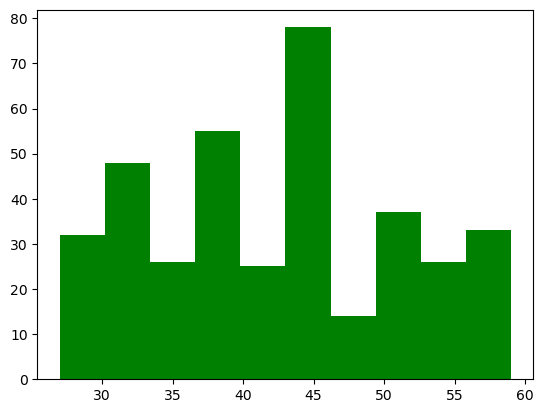

In [ ]:
plt.hist(raw_data.Age, color='green')

*The majority of participants are in their mid-forties (around age 40).*

(array([  8.,   9.,  70.,   8.,  69.,  69.,   4., 101.,   0.,  36.]),
 array([ 3000.,  3700.,  4400.,  5100.,  5800.,  6500.,  7200.,  7900.,
         8600.,  9300., 10000.]),
 <BarContainer object of 10 artists>)

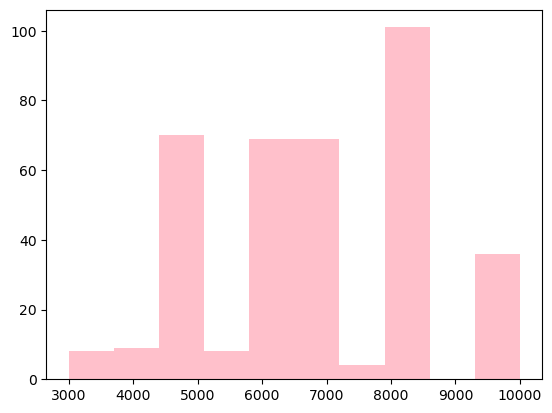

In [ ]:
plt.hist(raw_data['Daily Steps'], color='pink')

In [ ]:
raw_data['Sleep Disorder'].value_counts(sort=True)

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [ ]:
raw_data['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

**Combine 'Normal' and 'Normal Weight' categories since they appear to mean the same thing**

In [ ]:
raw_data['BMI Category'] = raw_data['BMI Category'].replace({'Normal Weight': 'Normal'})
raw_data['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

**Based on initial exploration, the dataset appears clean and free of any significant outliers. I will next look at some basic stats and create groupings to examine relationships between variables.**

*Summarizing the data by*
**creating a dataframe of just the numerical variables**

In [ ]:
data_num = raw_data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]

**View basic stats of all variables in data_num**

In [ ]:
data_num.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


**Grouping by 'Gender' and calculate mean of numeric columns, Sort the resulting averages by 'Quality of Sleep'**

In [ ]:
gender_means = raw_data.groupby('Gender').mean(numeric_only=True)
gender_means_sorted = gender_means.sort_values(by='Quality of Sleep')
print(gender_means_sorted)


         Person ID        Age  Sleep Duration  Quality of Sleep  \
Gender                                                            
Male    125.095238  37.074074        7.036508          6.968254   
Female  251.254054  47.405405        7.229730          7.664865   

        Physical Activity Level  Stress Level  Heart Rate  Daily Steps  
Gender                                                                  
Male                  59.201058      6.079365   71.052910  6793.650794  
Female                59.140541      4.675676   69.259459  6840.540541  


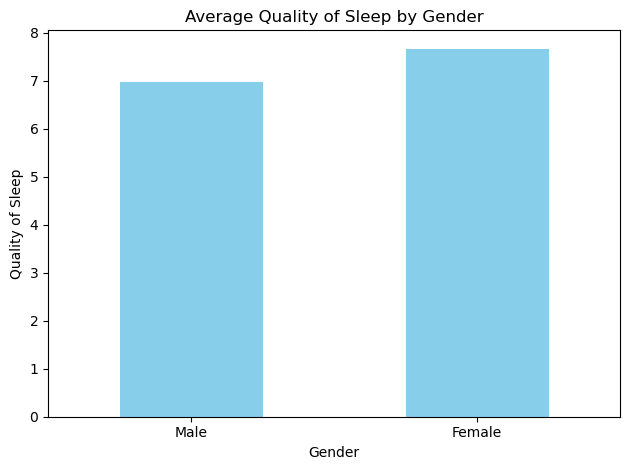

In [ ]:
import matplotlib.pyplot as plt
gender_means_sorted['Quality of Sleep'].plot(kind='bar', color='skyblue')

plt.title('Average Quality of Sleep by Gender')
plt.ylabel('Quality of Sleep')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

*The plot reveals the mean of sleep quality across genders, highlighting their potential differences.  The use of a bar plot is effective in visualizing these mean differences. This highligts that the average quality of sleep for females is greater than that of males*

**Group by Occupation and calculate the mean of only numeric columns**

In [ ]:
occupation_means = raw_data.groupby('Occupation').mean(numeric_only=True)
occupation_means_sorted = occupation_means.sort_values(by='Quality of Sleep')
print(occupation_means_sorted)

                    Person ID        Age  Sleep Duration  Quality of Sleep  \
Occupation                                                                   
Scientist           75.500000  33.500000        6.000000          5.000000   
Salesperson        205.794118  42.617647        6.373529          5.882353   
Software Engineer   46.250000  31.250000        6.750000          6.500000   
Doctor              64.056338  32.676056        6.970423          6.647887   
Teacher            196.075000  41.725000        6.690000          6.975000   
Manager            264.000000  45.000000        6.900000          7.000000   
Nurse              295.849315  51.794521        7.063014          7.369863   
Accountant         153.054054  39.621622        7.113514          7.891892   
Lawyer             153.893617  39.425532        7.410638          7.893617   
Engineer           245.920635  46.587302        7.987302          8.412698   

                   Physical Activity Level  Stress Level  Heart

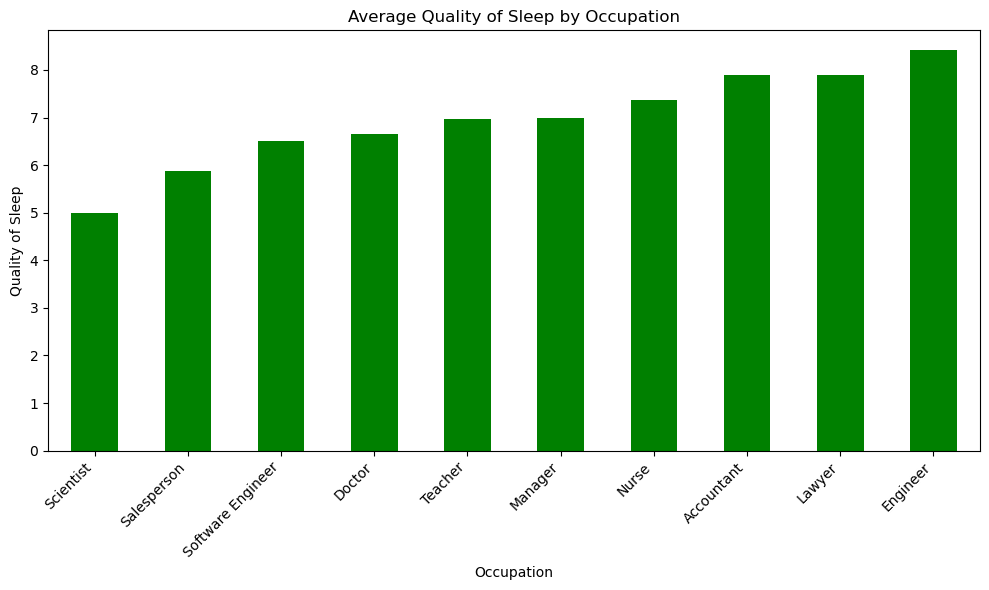

In [ ]:
import matplotlib.pyplot as plt
occupation_means_sorted['Quality of Sleep'].plot(kind='bar', figsize=(10, 6), color='green')

plt.title('Average Quality of Sleep by Occupation')
plt.ylabel('Quality of Sleep')
plt.xlabel('Occupation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Create a correlation matrix for the numerical variables**

In [ ]:
data_num.corr()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


*Based on the correlation matrix, 'quality of sleep' is most correlated with 'sleep duration' and 'stress level'. It appears moderately correlated with 'heart rate'. 'Sleep Duration' and 'Stress Level' are also highly correlated, and 'Stress Level' is moderately correlated with 'Heart Rate'.*



# Creating visuals

**Visualizing the relationship between the most correlated variables to quality of sleep**


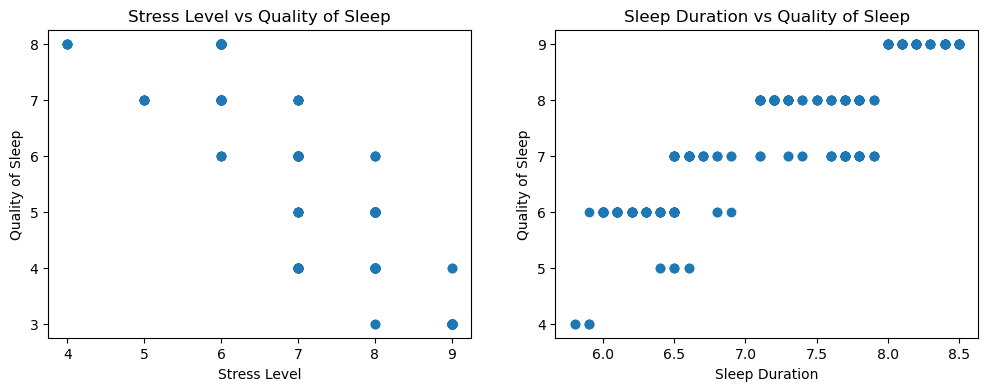

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot for quality of sleep vs stress level
ax1.scatter(raw_data['Quality of Sleep'], raw_data['Stress Level'])
ax1.set_title('Stress Level vs Quality of Sleep')
ax1.set_xlabel('Stress Level')
ax1.set_ylabel('Quality of Sleep')

# Scatter plot for quality of sleep vs sleep duration
ax2.scatter(raw_data['Sleep Duration'], raw_data['Quality of Sleep'])
ax2.set_title('Sleep Duration vs Quality of Sleep')
ax2.set_xlabel('Sleep Duration')
ax2.set_ylabel('Quality of Sleep')

plt.show()


**Stress Level vs. Quality of Sleep**

This plot shows an inverse relationship between stress level and quality of sleep. As stress levels increase, the quality of sleep tends to decrease. This suggests that higher stress is associated with poorer sleep quality, which is consistent with research showing that stress can disrupt sleep.

**Sleep Duration vs. Quality of Sleep**

This plot illustrates a positive relationship between sleep duration and quality of sleep. As sleep duration increases, the quality of sleep also improves. This aligns with the idea that longer periods of rest contribute to better overall sleep quality.

**Visualizing the relationship between stress levels and both sleep duration and heart rate**


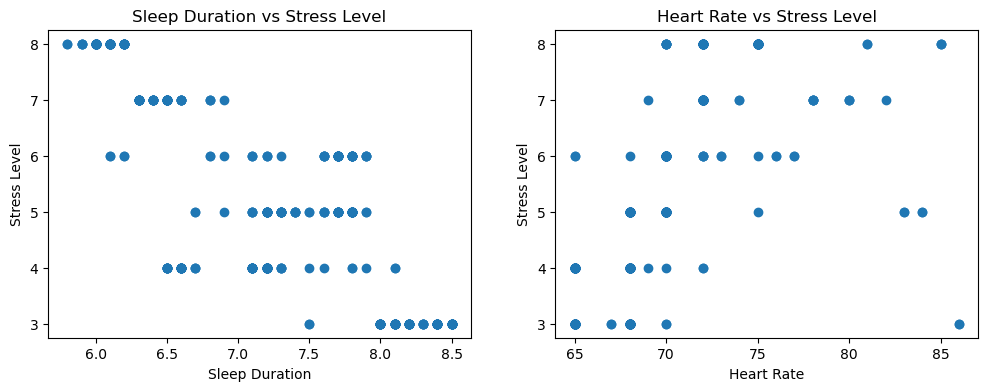

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot for quality of sleep vs stress level
ax1.scatter(raw_data['Sleep Duration'], raw_data['Stress Level'])
ax1.set_title('Sleep Duration vs Stress Level')
ax1.set_xlabel('Sleep Duration')
ax1.set_ylabel('Stress Level')

# Scatter plot for quality of sleep vs sleep duration
ax2.scatter(raw_data['Heart Rate'], raw_data['Stress Level'])
ax2.set_title('Heart Rate vs Stress Level')
ax2.set_xlabel('Heart Rate')
ax2.set_ylabel('Stress Level')

plt.show()


**Sleep Duration vs. Stress Level**

The scatter plot visualizes the relationship between sleep duration and stress level. As sleep duration increases, it appears that stress levels tend to decrease. This suggests that individuals who get more sleep may experience lower stress levels, which aligns with common understanding that adequate rest helps manage stress.

**Heart Rate vs. Stress Level**

This scatter plot compares heart rate with stress level. It shows that as heart rate increases, stress levels also increase. This could indicate that higher heart rates are associated with higher stress, which is consistent with the idea that elevated heart rate often correlates with stress or anxiety

**Visualizing some of the categorical variables and their relation to quality of sleep**

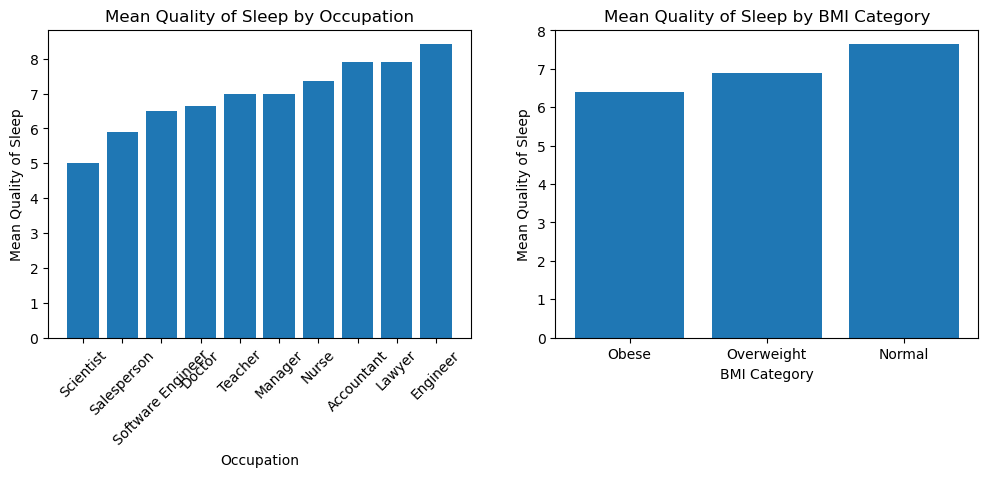

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
occupation_quality = raw_data.groupby('Occupation')['Quality of Sleep'].mean().sort_values()
bmi_quality = raw_data.groupby('BMI Category')['Quality of Sleep'].mean().sort_values()

# Bar plot for occupation vs quality of sleep
ax1.bar(occupation_quality.index, occupation_quality.values)
ax1.set_title('Mean Quality of Sleep by Occupation')
ax1.set_xlabel('Occupation')
ax1.set_ylabel('Mean Quality of Sleep')
ax1.set_xticks(range(len(occupation_quality.index)))
ax1.set_xticklabels(occupation_quality.index, rotation=45)

# Bar plot for BMI vs quality of sleep
ax2.bar(bmi_quality.index, bmi_quality.values)
ax2.set_title('Mean Quality of Sleep by BMI Category')
ax2.set_xlabel('BMI Category')
ax2.set_ylabel('Mean Quality of Sleep')

plt.show()


**Mean Quality of Sleep by Occupation**

Occupation vs. Quality of Sleep

This is to examine how sleep quality varies across different occupations. The data is grouped by occupation, and the mean quality of sleep is calculated for each group. The resulting values are then sorted in ascending order to allow for a clear comparison. This is done using the groupby method where the data is grouped by the Occupation column, and the average quality of sleep for each occupation is computed.

A bar plot is created to display the results, the x-axis represents the different occupations, and the y-axis shows the mean quality of sleep for each occupation. The bar plot visually depicts which occupations have the highest and lowest average quality of sleep, providing insights into the potential relationship between the nature of certain jobs and sleep quality. Occupations associated with high levels of stress, irregular hours, or physically demanding tasks may show lower average sleep quality, whereas jobs that are less stressful or more flexible might have higher sleep ratings.


**Mean Quality of Sleep by BMI**

BMI Category vs. Quality of Sleep

This plot explores the relationship between BMI category and the quality of sleep. BMI is a common measure used to assess whether an individual has a healthy weight, and it is categorized into various groups such as underweight, normal weight, overweight, and obese. In this analysis, the dataset is grouped by the BMI Category column, and the mean quality of sleep is calculated for each group.

A bar plot is created with BMI categories on the x-axis and the mean quality of sleep on the y-axis. This allows for a visual comparison of sleep quality across different BMI groups. The insights gathered from this plot can help identify whether there is a significant difference in sleep quality depending on an individual's BMI. The individuals with higher BMI categories, particularly those categorized as overweight or obese, experience poorer sleep quality. This could be due to various health-related issues, such as sleep apnea, which is more prevalent in individuals with higher BMI. On the other hand, individuals in the normal weight category may exhibit better sleep quality due to fewer associated health complications.



# Creating models

**Create a linear regression model to predict quality of sleep**

In [ ]:
from sklearn.linear_model import LinearRegression

# Define the response variable and predictors
X = data_num[['Sleep Duration', 'Stress Level', 'Heart Rate']]
y = data_num['Quality of Sleep']

model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print('Coefficients:', model.coef_)


Coefficients: [ 0.69333281 -0.29661064 -0.03681626]


**Sleep Duration (0.693)**

Holding other variables constant, a one-unit increase in sleep duration is associated with an average increase of 0.693 units in quality of sleep.

**Stress Level (-0.297)**

Controlling for sleep duration and heart rate, a one-unit increase in stress level is associated with an average decrease of 0.297 units in sleep quality.

**Heart Rate coefficient (-0.0368)**

Holding other variables constant, a one-unit increase in heart rate is associated with an average decrease of 0.037 units in sleep quality.**

**Creating a linear regression model to predict sleep duration**

In [ ]:
from sklearn.linear_model import LinearRegression

# Define the response variable and predictors
X = data_num[['Stress Level', 'Heart Rate']]
y = data_num['Sleep Duration']

model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print('Coefficients:', model.coef_)

Coefficients: [-0.37833747  0.00940953]


**Stress Level (-0.378)**

For each one-unit increase in stress level, the predicted quality of sleep decreases by 0.378 units, assuming heart rate stays constant. Higher stress lowers sleep quality.

**Heart Rate (0.009)**

For each one-unit increase in heart rate, the predicted quality of sleep increases by 0.009 units, assuming stress level stays constant. However, the impact of heart rate on sleep quality is very small.

**Conclusion**


The linear regression models provide more details about how much our correlated features impact sleep quality. We have the following conclusions:

1. The attributes most correlated with sleep quality are sleep duration, stress level, and heart rate. More specifically:

For each extra hour of sleep (up to 8.5 hours), quality of sleep improves by about 7%
For each unit increase in stress level (on a scale of 1-10), quality of sleep decreases by about 3%
For each unit increase in average heart rate, quality of sleep decreases by about .4%

2. Clearly sleep duration is important for improving sleep quality. So what are the factors that impact sleep duration?

For each unit increase in stress level, sleep duration decreases by about .4 hrs (24 minutes)
For each unit increase in average heart rate sleep duration increases by .009 hrs, or approximately .5 minutes

3. In terms of occupation, scientists and salespersons had the lowest quality of sleep ratings, while engineers had the highest.


**Recommendations**


If you have beens struggling with low quality sleep, consider the following recommendations:

- Scientists rated their sleep quality an average of 5 out of 10, while engineers scored theirs much higher at 8.4 out of 10, showing a noticeable difference. Perhaps it’s time to rethink your career path?

- The amount of sleep you get is the key factor in enhancing sleep quality. One way to extend your sleep is by reducing stress levels.

- Although it's less significant, heart rate also influences both sleep quality and duration. Lowering your average resting heart rate can lead to improvements in both areas.
